In [3]:
#Linear Regression testing
import numpy as np 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X, y = make_regression(n_samples=500, n_features=1, noise=50, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape: ")
print(X_train.shape)
print(X_test.shape)

print("Testing data shape: ")
print(y_train.shape)
print(y_test.shape)                                                               

Training data shape: 
(350, 1)
(150, 1)
Testing data shape: 
(350,)
(150,)


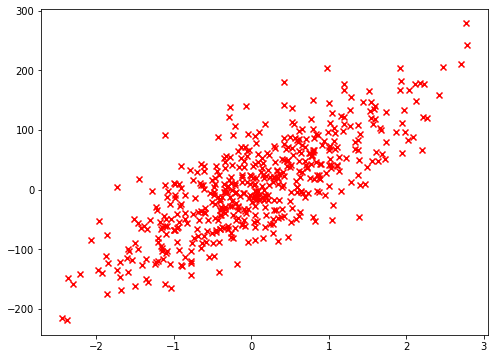

In [5]:
#plotting to see the pattern of our data, we can see a linear relationship between the independent & target variable
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker="x", color="r")

In [10]:
#hypothesis = theta_0 + theta_1 * (x) is the equation fo Simple Linear Regression

#function to calculate the mean_squared_error
def mse(y_prediction, y):
    return np.mean((y_prediction - y)**2)

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations #no. of iterations of the GD algo
        self.theta_0 = None #y-intercept
        self.theta_1 = None #slope
    
    #function to fit our data and create a Linear Regression Model
    def fit(self, X, y):
        n_rows, n_features = X.shape #getting no. of rows and no. of features 
        
        self.theta_0 = 0 
        self.theta_1 = np.zeros(n_features) #creating a np array of zeros of the same size as no. of features 
        
        #implementing the Gradient Descent algorithm
        for i in range(self.n_iterations):
            hypothesis = self.theta_0 + np.dot(X, self.theta_1) #our h0(x) equation
            
            #the latter terms in the below equations are the derivatives of the Cost Function
            self.theta_0 = self.theta_0 - (self.learning_rate * (1/n_rows) * np.sum((hypothesis - y))) 
            self.theta_1 = self.theta_1 - (self.learning_rate * (1/n_rows) * np.dot(np.transpose(X),(hypothesis - y)))
              
    #function to make predcitions
    def predict(self, X):
        y_predicted = self.theta_0 + np.dot(X, self.theta_1) #making predictions based on the found 0o and 01
        return y_predicted

In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
regr_line = regr.predict(X_train)

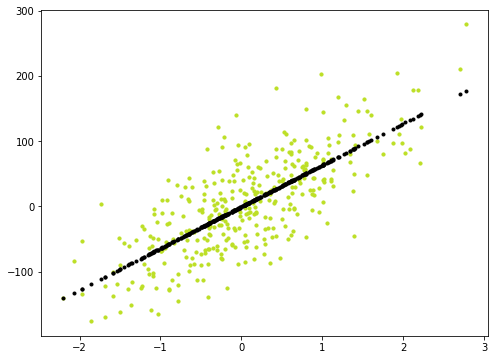

In [15]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_train, regr_line, color="black", marker=".")
plt.show()

In [16]:
#getting a huge mean squared error for this model
print(mse(y_prediction, y_test))

2459.59986053458


In [20]:
#lets change the learning rate and train the model again
regr = LinearRegression(learning_rate=0.001)
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
regr_line = regr.predict(X_train)

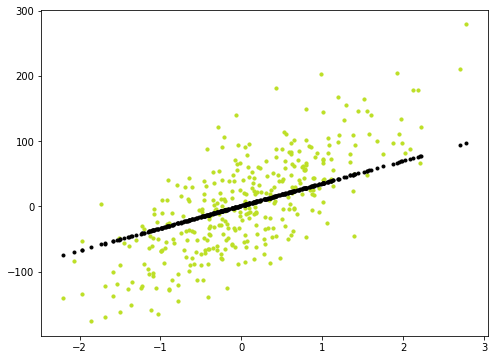

In [21]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_train, regr_line, color="black", marker=".")
plt.show()

In [23]:
#getting a MSE that is greater than before meaning the smaller learning rate didn't help 
print(mse(y_prediction, y_test))

3461.852707309082


In [24]:
#lets change the learning rate and train the model again. Making the learning rate greater than the default one
regr = LinearRegression(learning_rate=0.1)
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
regr_line = regr.predict(X_train)

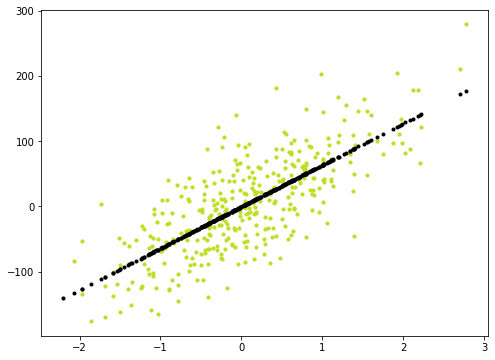

In [25]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_train, regr_line, color="black", marker=".")

In [27]:
#gettiing a MSE close to the one with the learning rate 0.01
print(mse(y_prediction, y_test))

2459.786147303689


In [28]:
#lets change the no. of iterations (increasing them)
regr = LinearRegression(n_iterations=2000)
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
regr_line = regr.predict(X_train)

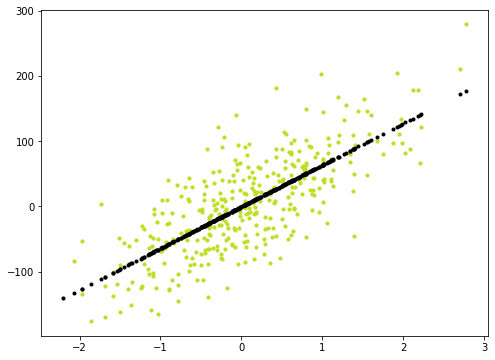

In [29]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_train, regr_line, color="black", marker=".")

In [30]:
#gettiing a MSE close to the one with the learning rate 0.01
print(mse(y_prediction, y_test))

2459.78605615571


In [31]:
#lets change the no. of iterations (decreasing them)
regr = LinearRegression(n_iterations=300)
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
regr_line = regr.predict(X_train)

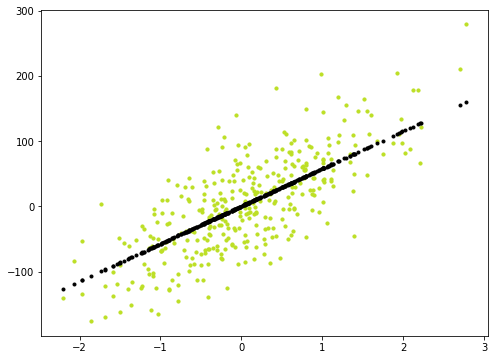

In [32]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_train, regr_line, color="black", marker=".")

In [33]:
#gettiing a MSE a bit graeter than the one with learning rate 0.01
print(mse(y_prediction, y_test))

2477.28789430766


These MSEs are too high & we're really not getting a MSE lower than this. This might also be due to the noise in data. We'll try lowering the noise in the data and fit our model again

In [34]:
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape: ")
print(X_train.shape)
print(X_test.shape)

print("Testing data shape: ")
print(y_train.shape)
print(y_test.shape)                                                               

Training data shape: 
(350, 1)
(150, 1)
Testing data shape: 
(350,)
(150,)


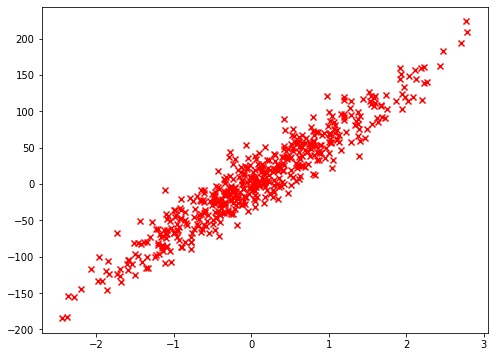

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker="x", color="r")

In [36]:
#lets change the learning rate and train the model again. Making the learning rate greater than the default one
regr = LinearRegression()
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
regr_line = regr.predict(X_train)

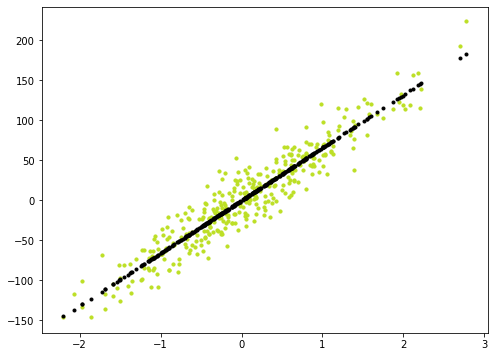

In [37]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_train, regr_line, color="black", marker=".")

In [39]:
#when the noise in data is lowered
print(mse(y_prediction, y_test))

393.4896697908619
